Line graph: 
        EVSales
year           
2010     1409.0
2011     7080.0
2012    19300.0
2013    45000.0
2014    56000.0
2015   119000.0
2016   118000.0
2017   170000.0
2018   240000.0
2019   390000.0
2020  1050000.0
2021  1750000.0
2022  1980000.0


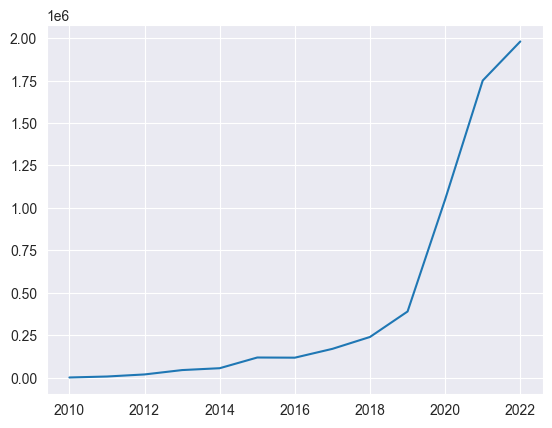

"\n\n\nplt.plot(result)       \nax.xaxis.get_data_interval()\nax.yaxis.get_data_interval()\nax.margins(0.05)\n#plt.tight_layout()\nplt.show() \n\n\nx = np.array([0,1,2,3])\ny = np.array([0.650, 0.660, 0.675, 0.685])\nmy_xticks = ['a', 'b', 'c', 'd']\nplt.xticks(x, my_xticks)\nplt.yticks(np.arange(y.min(), y.max(), 0.005))\nplt.plot(x, y)\nplt.grid(axis='y', linestyle='-')\n"

In [262]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("IEA Global EV Data 2023.csv")


result = df.loc[(df['region'] == 'EU27') & (df['category'] == 'Historical') & (df['parameter'] == 'EV sales') & (df['mode'] == 'Cars') ].groupby(["year"]).agg(EVSales=('value', 'sum'))


# plotting a line graph 
print("Line graph: ") 
print(result)
#plt.plot(result["year"], result["EVSales"]) 
fig, ax = plt.subplots()
ax.plot(result)

#print(ax.xaxis.get_data_interval())
#print(ax.yaxis.get_data_interval())

plt.show()

'''


plt.plot(result)       
ax.xaxis.get_data_interval()
ax.yaxis.get_data_interval()
ax.margins(0.05)
#plt.tight_layout()
plt.show() 


x = np.array([0,1,2,3])
y = np.array([0.650, 0.660, 0.675, 0.685])
my_xticks = ['a', 'b', 'c', 'd']
plt.xticks(x, my_xticks)
plt.yticks(np.arange(y.min(), y.max(), 0.005))
plt.plot(x, y)
plt.grid(axis='y', linestyle='-')
'''

In [2]:
import psycopg2 

createString = """
CREATE TABLE IF NOT EXISTS GLOBAL_EV_DATA (
Region	varchar(50),
Category varchar(50),
Parameter	varchar(50),
Mode	varchar(200),
Powertrain	varchar(50),
Year	integer,
unit	varchar(300),
value	numeric
);
"""

readdata = '''select count(*) from GLOBAL_EV_DATA;'''


In [5]:
try :
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
        database = "climate")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    #dbCursor.execute("drop table GLOBAL_EV_DATA;")
    dbCursor.execute(createString)
    dbCursor.execute(readdata)
    print (dbCursor.fetchall())
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection):
        dbConnection.close()

[(0,)]


In [7]:
import csv


try:
    dbConnection = psycopg2.connect(
                            user = "dap",
                            password = "dap",
                            host = "192.168.56.30",
                            port = "5432",
                            database = "climate")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    #insertString = "INSERT INTO GreenHouse_CO2 VALUES ('{}',"+"'{}',"*8+"'to_number({}, '9999999999.99999')','{}','{}','{}')"
    insertString = "INSERT INTO GLOBAL_EV_DATA VALUES ('{}'," + "'{}',"*6 + "{})"

    print(insertString)
    with open('IEA Global EV Data 2023.csv', 'r') as f:
        reader = csv.reader(f)
        next(reader) # skip the header
        for row in reader:
            dbCursor.execute(insertString.format(*row))
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection):
        dbConnection.close()

INSERT INTO GLOBAL_EV_DATA VALUES ('{}','{}','{}','{}','{}','{}','{}',{})


In [264]:
totalEVStock_Cars = '''Select Year,  
    Sum(Value) as TotalEVCars
    from GLOBAL_EV_DATA
    where Region = 'EU27' and Category = 'Historical' and Parameter = 'EV stock' and mode = 'Cars'
    group by  Year
'''


totalEVStock_Percent = '''Select Year,  
    Value as TotalEVCarsPercentage
    from GLOBAL_EV_DATA
    where Region = 'EU27' and Category = 'Historical' and Parameter = 'EV stock share' and mode = 'Cars'
'''


try:
    dbConnection = psycopg2.connect(user = "dap",
    password = "dap",
    host = "192.168.56.30",
    port = "5432",
    database = "climate")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(totalEVStock_Cars)
    allEVCars = dbCursor.fetchall(); 
    for i in allEVCars: 
        print(i) 
    dbCursor.execute(totalEVStock_Percent)
    allEVCarsPercentage = dbCursor.fetchall(); 
    for i in allEVCarsPercentage: 
        print(i) 
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection):
        dbConnection.close()


(2010, Decimal('2840'))
(2011, Decimal('10430'))
(2012, Decimal('30900'))
(2013, Decimal('77000'))
(2014, Decimal('133000'))
(2015, Decimal('250000'))
(2016, Decimal('370000'))
(2017, Decimal('510000'))
(2018, Decimal('750000'))
(2019, Decimal('1090000'))
(2020, Decimal('2180000'))
(2021, Decimal('3900000'))
(2022, Decimal('5700000'))
(2010, Decimal('0.00139999995008111'))
(2011, Decimal('0.004999999888241291'))
(2012, Decimal('0.014000000432133675'))
(2013, Decimal('0.03500000014901161'))
(2014, Decimal('0.05999999865889549'))
(2015, Decimal('0.10999999940395355'))
(2016, Decimal('0.17000000178813934'))
(2017, Decimal('0.23000000417232513'))
(2018, Decimal('0.33000001311302185'))
(2019, Decimal('0.44999998807907104'))
(2020, Decimal('0.8600000143051147'))
(2021, Decimal('1.600000023841858'))
(2022, Decimal('2.299999952316284'))


       EVCars      EVCarsPercentage                  AllCars_Total
Year                                                              
2010     2840   0.00139999995008111  202857150.0902884007647119615
2011    10430  0.004999999888241291  208600004.6625734436966377370
2012    30900  0.014000000432133675  220714278.9015662523779437217
2013    77000   0.03500000014901161  219999999.0633555982734540085
2014   133000   0.05999999865889549  221666671.6213028838003051590
2015   250000   0.10999999940395355  227272728.5042282091523548550
2016   370000   0.17000000178813934  217647056.5342160939762596841
2017   510000   0.23000000417232513  221739126.4123142198506723437
2018   750000   0.33000001311302185  227272718.2417208478406695172
2019  1090000   0.44999998807907104  242222228.6389199558609828554
2020  2180000    0.8600000143051147  253488367.8765346772213674463
2021  3900000     1.600000023841858  243749996.3678419994358720519
2022  5700000     2.299999952316284  247826092.094464779487958

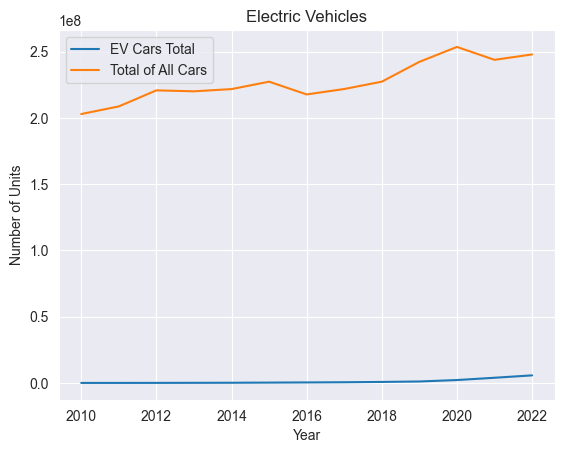

In [268]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(allEVCars, columns =['Year', 'EVCars'])
sorted_df_cars = df.sort_values('Year').reindex()
#print(sorted_df_cars)

df1 = pd.DataFrame(allEVCarsPercentage, columns =['Year', 'EVCarsPercentage'])
sorted_df_all = df1.sort_values('Year').reindex()
#print(sorted_df_all)

df_combined = pd.merge(sorted_df_cars, sorted_df_all, on='Year')

# using apply function to create a new column
df_combined['AllCars_Total'] = df_combined.apply(lambda row: 100*row.EVCars/row.EVCarsPercentage, axis = 1)

df_combined.set_index("Year", inplace=True)

print(df_combined)


plt.plot(df_combined.index, df_combined['EVCars'], label = 'EV Cars Total')
plt.plot(df_combined.index, df_combined['AllCars_Total'], label = 'Total of All Cars')
plt.title("Electric Vehicles")
plt.xlabel('Year')
plt.ylabel('Number of Units')
plt.legend()
#plt.ylim(0, df_combined.max().iloc[2] + 1000000)
plt.show()



2010
[2023 2024 2025 2026 2027 2028 2029 2030 2031 2032]


C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rames\PycharmProjects\pyt

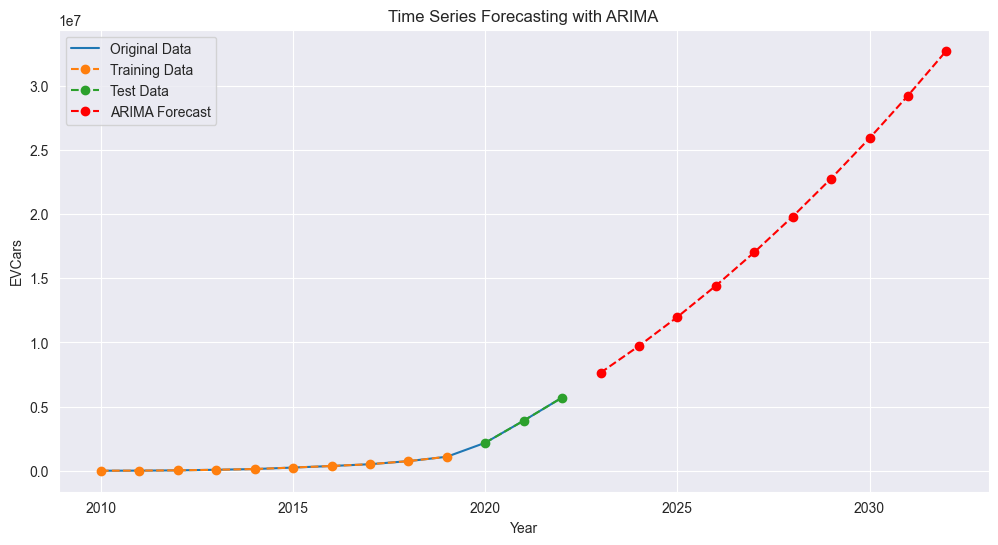

Year
2020    2180000
2021    3900000
2022    5700000
Name: EVCars, dtype: object
[ 7632205.02544945  9721141.06948486 11978330.47759218 14409186.46361186
 17016252.16289065 19800722.34393067 22763158.31062612 25903823.76432259
 29222842.59227683 32720272.99689337]


In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

df_raw = df_combined

# Plot the original time series data
'''
plt.figure(figsize=(10, 6))
plt.plot(df_raw.index, df['EVCars'], label='Original Data')
plt.title('Electric Vehicles Dataset')
plt.xlabel('Year')
plt.ylabel('EVCars')
plt.legend()
plt.show()
'''
# Splitting the data into training and testing sets
train_size = int(len(df_raw) * 0.8)
train, test = df_raw[:train_size], df_raw[train_size:]


# Fit ARIMA model
order = (1,3,1)  # ARIMA parameters (p, d, q)
model = ARIMA(df_raw['EVCars'].astype(float), order=order)
fit_model = model.fit()

forecast_steps = 10  # Adjust the number of steps as needed

# Forecasting
forecast = fit_model.get_forecast(steps=forecast_steps)
conf_int = forecast.conf_int()
forecast_values = forecast.predicted_mean

print(df_raw.index.min())
# Extend the time index for plotting
forecast_index = np.arange(df_raw.index.max() +1, df_raw.index.max() + forecast_steps + 1)

print(forecast_index)


# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df_raw.index, df_raw['EVCars'], label='Original Data')
plt.plot(train.index, train['EVCars'], label='Training Data', linestyle='--', marker='o')
plt.plot(test.index, test['EVCars'], label='Test Data', linestyle='--', marker='o')

# Plot the ARIMA Forecast along with confidence interval
plt.plot(forecast_index[-forecast_steps:], forecast_values, label='ARIMA Forecast', color='red', linestyle='--', marker='o')

plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Year')
plt.ylabel('EVCars')
plt.legend()
plt.show()

print(test['EVCars'])
print(forecast_values.to_numpy())


C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rames\PycharmProjects\pyt

2010
[2023 2024 2025 2026 2027 2028 2029 2030 2031 2032]


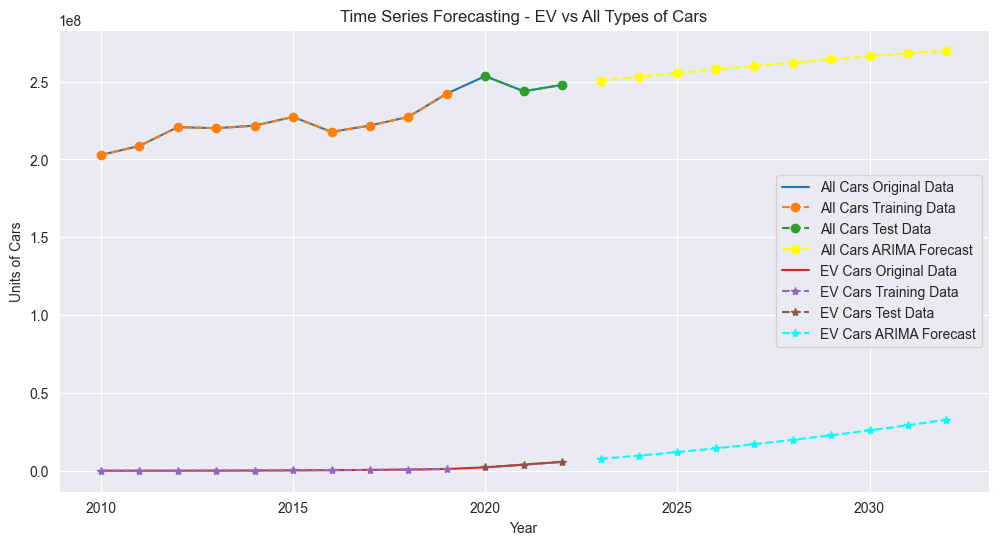

Year
2020    253488367.8765346772213674463
2021    243749996.3678419994358720519
2022    247826092.0944647794879581379
Name: AllCars_Total, dtype: object
[2.50496052e+08 2.53047692e+08 2.55486254e+08 2.57816749e+08
 2.60043968e+08 2.62172486e+08 2.64206677e+08 2.66150722e+08
 2.68008616e+08 2.69784176e+08]


In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

df_allCars = df_combined

# Plot the original time series data
'''
plt.figure(figsize=(10, 6))
plt.plot(df_raw.index, df['AllCars_Total'], label='Original Data')
plt.title('Electric Vehicles Dataset')
plt.xlabel('Year')
plt.ylabel('EVCars')
plt.legend()
plt.show()
'''
# Splitting the data into training and testing sets
train_size_all_cars = int(len(df_allCars) * 0.8)
train_all_cars, test_all_cars = df_allCars[:train_size_all_cars], df_allCars[train_size_all_cars:]


# Fit ARIMA model
order_all_cars = (1,1,1)  # ARIMA parameters (p, d, q)
model_all_cars = ARIMA(df_allCars['AllCars_Total'].astype(float), order=order_all_cars)
fit_model_all_cars = model_all_cars.fit()

forecast_steps_all_cars = 10  # Adjust the number of steps as needed

# Forecasting
forecast_all_cars = fit_model_all_cars.get_forecast(steps=forecast_steps_all_cars)
conf_int = forecast_all_cars.conf_int()
forecast_values_all_cars = forecast_all_cars.predicted_mean

print(df_allCars.index.min())
# Extend the time index for plotting
forecast_index_all_cars = np.arange(df_allCars.index.max() +1, df_allCars.index.max() + forecast_steps_all_cars + 1)

print(forecast_index_all_cars)


# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df_allCars.index, df_allCars['AllCars_Total'], label='All Cars Original Data')
plt.plot(train_all_cars.index, train_all_cars['AllCars_Total'], label='All Cars Training Data', linestyle='--', marker='o')
plt.plot(test_all_cars.index, test_all_cars['AllCars_Total'], label='All Cars Test Data', linestyle='--', marker='o')

# Plot the ARIMA Forecast along with confidence interval
plt.plot(forecast_index_all_cars[-forecast_steps_all_cars:], forecast_values_all_cars, label='All Cars ARIMA Forecast', color='yellow', linestyle='--', marker='o')


plt.plot(df_raw.index, df_raw['EVCars'], label='EV Cars Original Data')
plt.plot(train.index, train['EVCars'], label='EV Cars Training Data', linestyle='--', marker='*')
plt.plot(test.index, test['EVCars'], label='EV Cars Test Data', linestyle='--', marker='*')

# Plot the ARIMA Forecast along with confidence interval
plt.plot(forecast_index[-forecast_steps:], forecast_values, label='EV Cars ARIMA Forecast', color='cyan', linestyle='--', marker='*')


plt.title('Time Series Forecasting - EV vs All Types of Cars')
plt.xlabel('Year')
plt.ylabel('Units of Cars')
plt.legend()
plt.show()

print(test_all_cars['AllCars_Total'])
print(forecast_values_all_cars.to_numpy())


         EVCars
Year           
2010     2840.0
2011    10430.0
2012    30900.0
2013    77000.0
2014   133000.0
2015   250000.0
2016   370000.0
2017   510000.0
2018   750000.0
2019  1090000.0
2020  2180000.0
2021  3900000.0
2022  5700000.0
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
2010
[2023 2024 2025 2026 2027 2028 2029 2030 2031 2032]
[ 7632205.02544945  9721141.06948486 11978330.47759218 14409186.46361186
 17016252.16289065 19800722.34393067 22763158.31062612 25903823.76432259
 29222842.59227683 32720272.99689337]


C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


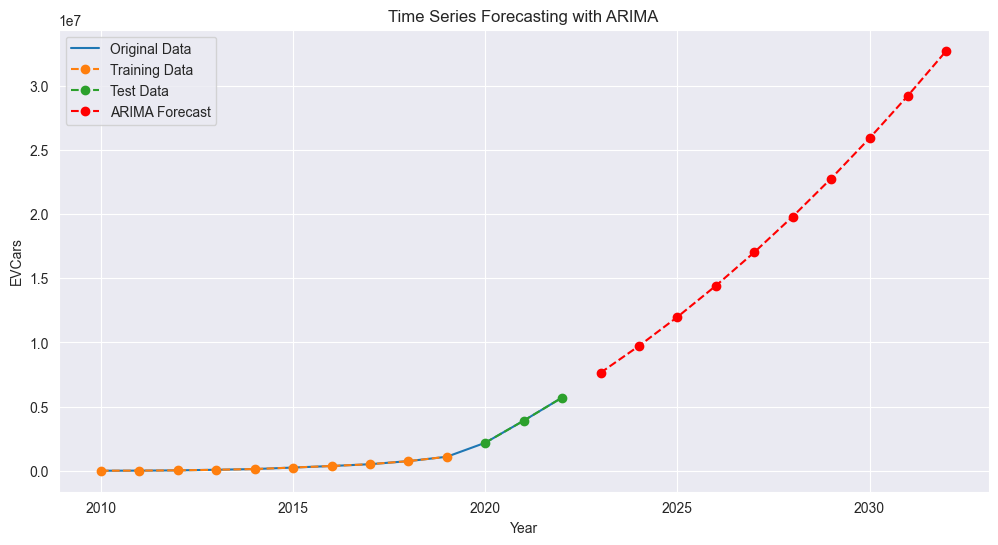

Year
2020    2180000.0
2021    3900000.0
2022    5700000.0
Name: EVCars, dtype: float64
[ 7632205.02544945  9721141.06948486 11978330.47759218 14409186.46361186
 17016252.16289065 19800722.34393067 22763158.31062612 25903823.76432259
 29222842.59227683 32720272.99689337]
Root Mean Squared Error (RMSE): 5860308.768209018


In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Creating the DataFrame
rawdata = {'Year': range(2010, 2023),
        'EVCars': [2840.0, 10430.0, 30900.0, 77000.0, 133000.0, 250000.0, 370000.0, 510000.0, 750000.0, 1090000.0, 2180000.0, 3900000.0, 5700000.0]}

df_raw = pd.DataFrame(rawdata)

# Set 'Year' as the index
df_raw.set_index("Year", inplace=True)

print(df_raw)

print(type(df_raw))
print(type(df_raw['EVCars']))
# Plot the original time series data
'''
plt.figure(figsize=(10, 6))
plt.plot(df_raw.index, df['EVCars'], label='Original Data')
plt.title('Electric Vehicles Dataset')
plt.xlabel('Year')
plt.ylabel('EVCars')
plt.legend()
plt.show()
'''
# Splitting the data into training and testing sets
train_size = int(len(df_raw) * 0.8)
train, test = df_raw[:train_size], df_raw[train_size:]

# Fit ARIMA model
order = (1,3,1)  # ARIMA parameters (p, d, q)
model = ARIMA(df_raw['EVCars'].to_numpy(), order=order)
fit_model = model.fit()

forecast_steps = 10  # Adjust the number of steps as needed

# Forecasting
forecast = fit_model.get_forecast(steps=forecast_steps)
conf_int = forecast.conf_int()
forecast_values = forecast.predicted_mean

print(df_raw.index.min())
# Extend the time index for plotting
forecast_index = np.arange(df_raw.index.max() +1, df_raw.index.max() + forecast_steps + 1)

print(forecast_index)
print(forecast_values)


# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df_raw.index, df_raw['EVCars'], label='Original Data')
plt.plot(train.index, train['EVCars'], label='Training Data', linestyle='--', marker='o')
plt.plot(test.index, test['EVCars'], label='Test Data', linestyle='--', marker='o')

# Plot the ARIMA Forecast along with confidence interval
plt.plot(forecast_index[-forecast_steps:], forecast_values, label='ARIMA Forecast', color='red', linestyle='--', marker='o')

plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Year')
plt.ylabel('EVCars')
plt.legend()
plt.show()

print(test['EVCars'])
print(forecast_values)
# Evaluate the model
mse = mean_squared_error(test['EVCars'], forecast_values[:len(test)])
rmse = sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2010
[2020 2021 2022]
[1831529.95345935 3319179.13830853 6089591.74869711]


C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


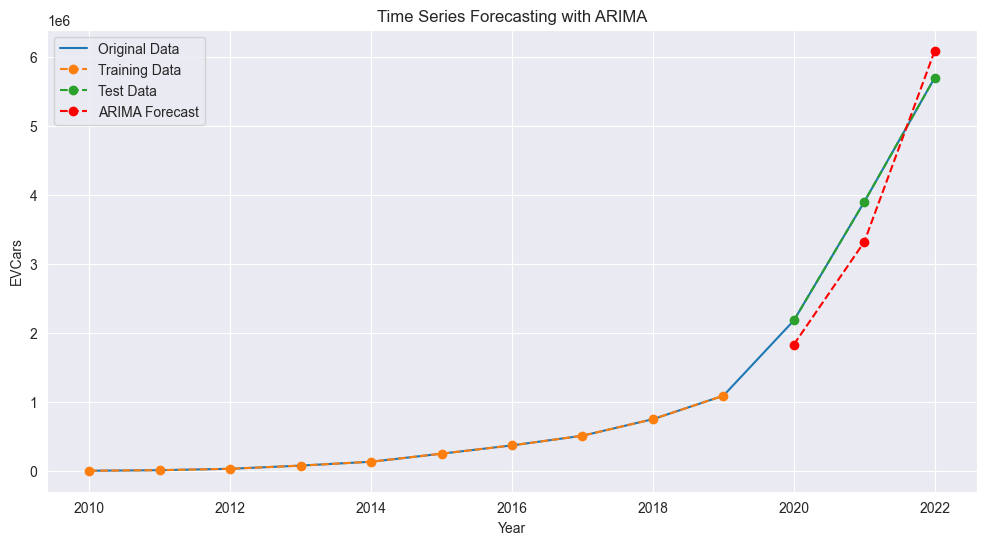

         EVCars
Year           
2020  2180000.0
2021  3900000.0
2022  5700000.0
[1831529.95345935 3319179.13830853 6089591.74869711]
Root Mean Squared Error (RMSE): 451134.11803473736


In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Creating the DataFrame
data = {'Year': range(2010, 2023),
        'EVCars': [2840.0, 10430.0, 30900.0, 77000.0, 133000.0, 250000.0, 370000.0, 510000.0, 750000.0, 1090000.0, 2180000.0, 3900000.0, 5700000.0]}

df = pd.DataFrame(data)

# Set 'Year' as the index
df.set_index("Year", inplace=True)

# Plot the original time series data
'''
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['EVCars'], label='Original Data')
plt.title('Electric Vehicles Dataset')
plt.xlabel('Year')
plt.ylabel('EVCars')
plt.legend()
plt.show()
'''
# Splitting the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit ARIMA model
order = (5,7,3)  # ARIMA parameters (p, d, q)
model = ARIMA(train['EVCars'].to_numpy(), order=order)
fit_model = model.fit()

forecast_steps = len(test)  # Adjust the number of steps as needed

# Forecasting
forecast = fit_model.get_forecast(steps=forecast_steps)
conf_int = forecast.conf_int()
forecast_values = forecast.predicted_mean

print(df.index.min())
# Extend the time index for plotting
#forecast_index = pd.date_range(start=df.index.max(), periods=forecast_steps + 1, freq='Y')  # Assuming annual frequency, starting from the last year in the data
forecast_index = np.arange(train.index.max() +1, train.index.max() + forecast_steps + 1)
# Assuming annual frequency

print(forecast_index)
print(forecast_values)


# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['EVCars'], label='Original Data')
plt.plot(train.index, train['EVCars'], label='Training Data', linestyle='--', marker='o')
plt.plot(test.index, test['EVCars'], label='Test Data', linestyle='--', marker='o')

# Plot the ARIMA Forecast along with confidence interval
plt.plot(forecast_index[-forecast_steps:], forecast_values, label='ARIMA Forecast', color='red', linestyle='--', marker='o')

plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Year')
plt.ylabel('EVCars')
plt.legend()
plt.show()

#print(train)
print(test)
print(forecast_values)
# Evaluate the model
mse = mean_squared_error(test['EVCars'], forecast_values)
rmse = sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
